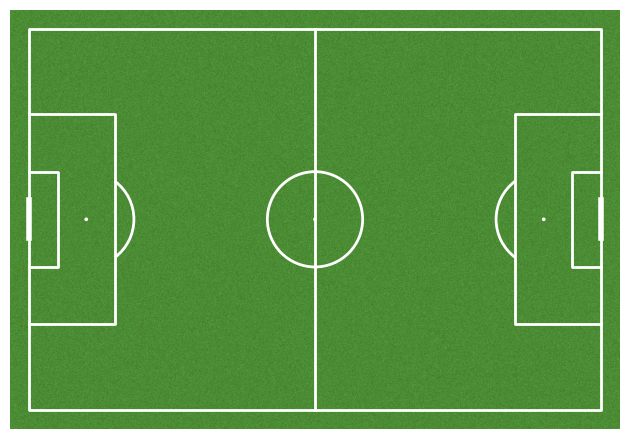

In [1]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
# Create a pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw()
plt.show() 

In [2]:
from kloppy import statsbomb

In [3]:
import glob
import pandas as pd